<a href="https://colab.research.google.com/github/MBrine85/HatGPT/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [85]:
class Model(nn.Module):
  # Input layer (4 features of flower) -> H1 (number of neurons) -> H3 (number of neurons) -> Output layer (3 classes of iris flower)
  def __init__(self, in_features=4, h1=64, h2=81, out_features=3):
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [86]:
torch.manual_seed(41)
model = Model()

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [88]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [89]:
df['species'] = df['species'].replace('setosa', 0.0)
df['species'] = df['species'].replace('versicolor', 1.0)
df['species'] = df['species'].replace('virginica', 2.0)

<ipython-input-89-e248df823654>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica', 2.0)


In [90]:
X = df.drop('species', axis=1)
y = df['species']
X = X.values
y = y.values

In [91]:
from sklearn.model_selection import train_test_split

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [93]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [94]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [95]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [96]:
epochs = 100000
losses = []
for i in range(epochs):
  y_pred = model.forward(X_train)

  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i % 10 == 0:
    print(f"Epoch: {i}, Loss: {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Streaming output truncated to the last 5000 lines.
Epoch: 50000, Loss: 0.0
Epoch: 50010, Loss: 0.0
Epoch: 50020, Loss: 0.0
Epoch: 50030, Loss: 0.0
Epoch: 50040, Loss: 0.0
Epoch: 50050, Loss: 0.0
Epoch: 50060, Loss: 0.0
Epoch: 50070, Loss: 0.0
Epoch: 50080, Loss: 0.0
Epoch: 50090, Loss: 0.0
Epoch: 50100, Loss: 0.0
Epoch: 50110, Loss: 0.0
Epoch: 50120, Loss: 0.0
Epoch: 50130, Loss: 0.0
Epoch: 50140, Loss: 0.0
Epoch: 50150, Loss: 0.0
Epoch: 50160, Loss: 0.0
Epoch: 50170, Loss: 0.0
Epoch: 50180, Loss: 0.0
Epoch: 50190, Loss: 0.0
Epoch: 50200, Loss: 0.0
Epoch: 50210, Loss: 0.0
Epoch: 50220, Loss: 0.0
Epoch: 50230, Loss: 0.0
Epoch: 50240, Loss: 0.0
Epoch: 50250, Loss: 0.0
Epoch: 50260, Loss: 0.0
Epoch: 50270, Loss: 0.0
Epoch: 50280, Loss: 0.0
Epoch: 50290, Loss: 0.0
Epoch: 50300, Loss: 0.0
Epoch: 50310, Loss: 0.0
Epoch: 50320, Loss: 0.0
Epoch: 50330, Loss: 0.0
Epoch: 50340, Loss: 0.0
Epoch: 50350, Loss: 0.0
Epoch: 50360, Loss: 0.0
Epoch: 50370, Loss: 0.0
Epoch: 50380, Loss: 0.0
Epoch: 50390,

Text(0.5, 0, 'Epoch')

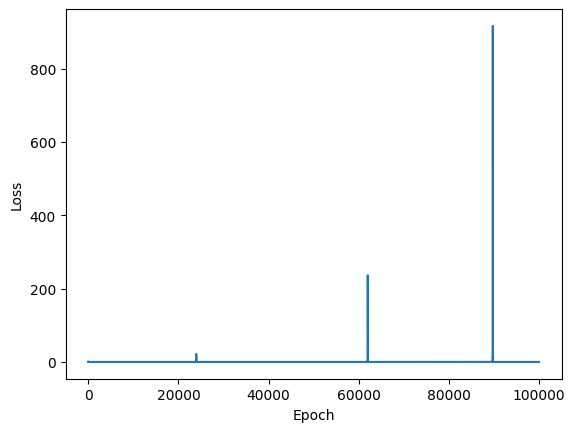

In [97]:
plt.plot(range(epochs), losses)
plt.ylabel("Loss")
plt.xlabel("Epoch")

tensor(0., grad_fn=<NllLossBackward0>)